# Plotting pixel density

Author: Melissa

See: https://github.com/astronomy-commons/hats/issues/417

Rename the `plot_points` method to something that's more descriptive, and 
while we're there, give more helpful title.

Let's start with a catalog that's on-disk (so it has a full healpix map to plot).

In [1]:
import hats
from hats.inspection import plot_density

catalog = hats.read_hats("/home/delucchi/git/plot/hats/tests/data/small_sky_source")

/home/delucchi/git/plot/hats/src/hats/inspection/visualize_catalog.py:309: UserWarning: This plot contains HEALPix pixels smaller than a pixel of the plot. Some values may be lost
  warnings.warn(


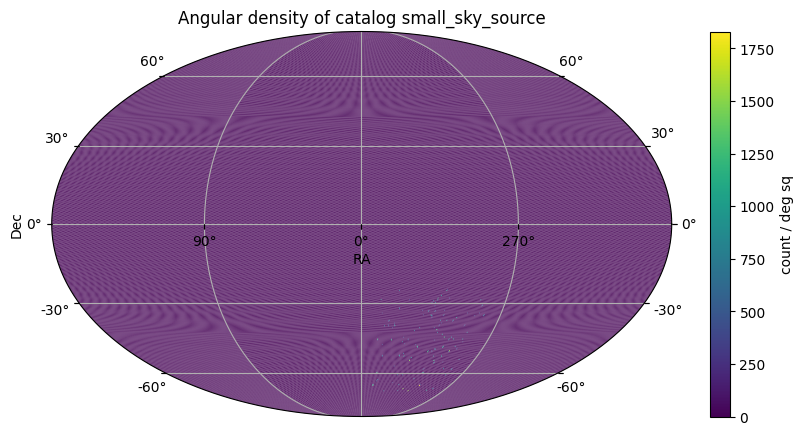

In [2]:
_ = plot_density(catalog)

The title is more useful, right?

But the plot itself isn't. You can't really see where the points are because it's at such a high order. The UI even gives us a warning that the pixels are going to be too small.

So I added an extra parameter.

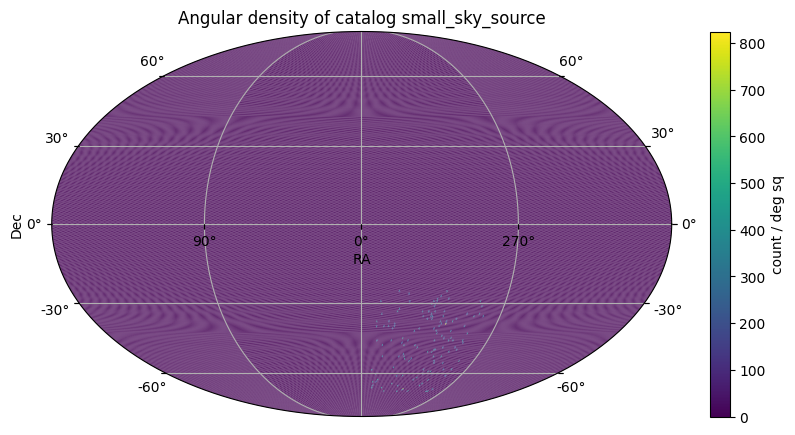

In [3]:
_ = plot_density(catalog, order=7)

That's a little better - there's no more warning, but the display still doesn't tell you much.

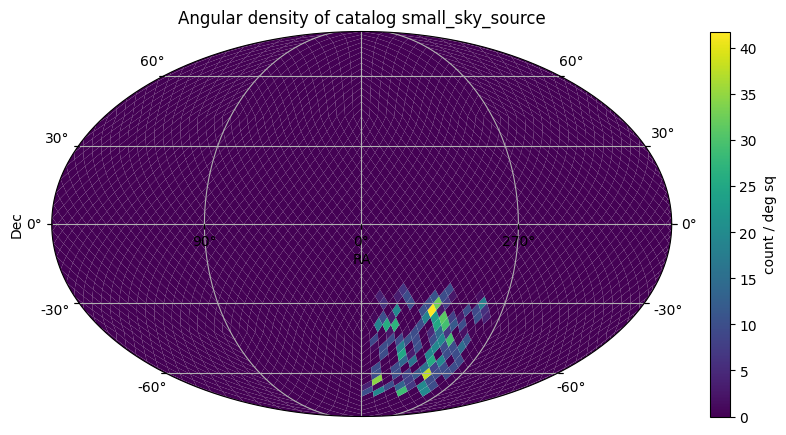

In [4]:
_ = plot_density(catalog, order=4)

Ooooh yeah. You can start to see something useful here.

What if we try to zoom in on the region we're interested in, then use a slightly higher order?

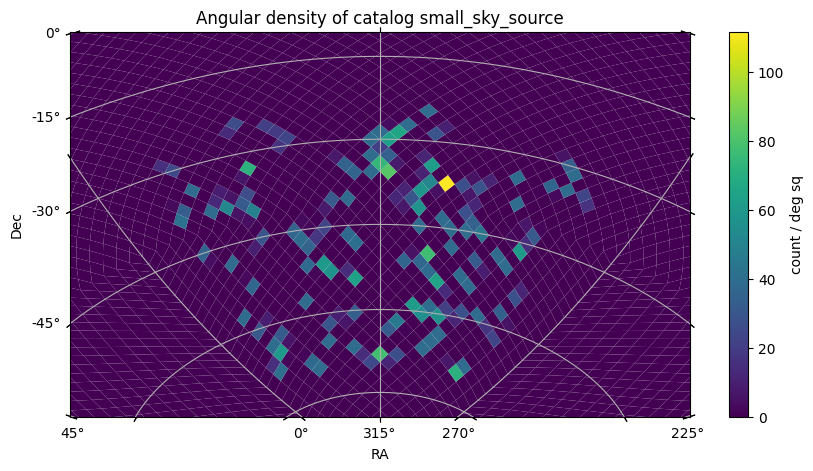

In [5]:
import astropy.units as u
from astropy.coordinates import SkyCoord

_ = plot_density(
    catalog,
    order=5,
    fov=(75 * u.deg, 75 * u.deg),
    center=SkyCoord(315, -45, unit="deg", frame="icrs"),
)

"BUT WHAT ABOUT UNITS?" they cry.

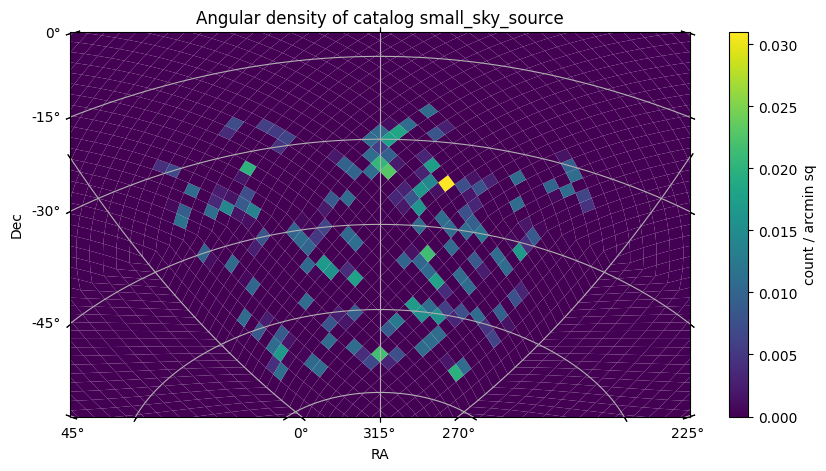

In [6]:
_ = plot_density(
    catalog,
    order=5,
    unit=u.arcmin,
    fov=(75 * u.deg, 75 * u.deg),
    center=SkyCoord(315, -45, unit="deg", frame="icrs"),
)

And doesn't that just seem like a thing A Scientist would want to do?